## Flight Price Prediction

Life cycle of Machine learning Project
- Data Analysis
- Feature Engineering
- Feature Selection
- Model Building
- Model Deployment

## Problem Statement
How the price of the flight is affected by the other variables such as Airline, Source and destination locations, number of transit, flight durations, how many hours before departure and date and month of the year

## Data Collection
- Data Source - https://www.kaggle.com/datasets/viveksharmar/flight-price-data
- The data set consist of 10683 rows and 14 columns

### Import Data and Required Packages

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import CSV Data as Panda DataFrame

In [119]:
df = pd.read_csv('data/flight_dataset.csv')

In [120]:
df

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,2019,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,2019,11,30,14,10,2,40


### Shape of dataset

In [121]:
df.shape

(10683, 14)

### Dataset Information

- Airlines: Names of the airlines operating the flights.
- Source and Destination: Cities where flights originate and land.
- Total Stops: Number of stops made by the flights.
- Price: Ticket prices for the respective flights.
- Date, Month, and Year: Specific dates on which the flights are scheduled.
- Departure and Arrival Times: Detailed hours and minutes for both departure and arrival.
- Duration: Total duration of flights in hours and minutes.

## Data Checks

### Check Missing Values

In [122]:
df.isna().sum()

Airline           0
Source            0
Destination       0
Total_Stops       0
Price             0
Date              0
Month             0
Year              0
Dep_hours         0
Dep_min           0
Arrival_hours     0
Arrival_min       0
Duration_hours    0
Duration_min      0
dtype: int64

### Check for duplicates

In [123]:
df.duplicated().sum()

np.int64(222)

### Drop duplicates

In [124]:
df = df.drop_duplicates(keep='first')

In [125]:
df.shape

(10461, 14)

### Check data type and null data

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10461 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10461 non-null  object
 1   Source          10461 non-null  object
 2   Destination     10461 non-null  object
 3   Total_Stops     10461 non-null  int64 
 4   Price           10461 non-null  int64 
 5   Date            10461 non-null  int64 
 6   Month           10461 non-null  int64 
 7   Year            10461 non-null  int64 
 8   Dep_hours       10461 non-null  int64 
 9   Dep_min         10461 non-null  int64 
 10  Arrival_hours   10461 non-null  int64 
 11  Arrival_min     10461 non-null  int64 
 12  Duration_hours  10461 non-null  int64 
 13  Duration_min    10461 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.2+ MB


## Feature Engineering

#### Adding route column

In [127]:
df["routes"] = df["Source"] + "->" + df["Destination"]

In [128]:
df

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,routes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50,Banglore->New Delhi
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25,Kolkata->Banglore
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0,Delhi->Cochin
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25,Kolkata->Banglore
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45,Banglore->New Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,2019,19,55,22,25,2,30,Kolkata->Banglore
10679,Air India,Kolkata,Banglore,0,4145,27,4,2019,20,45,23,20,2,35,Kolkata->Banglore
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,2019,8,20,11,20,3,0,Banglore->Delhi
10681,Vistara,Banglore,New Delhi,0,12648,1,3,2019,11,30,14,10,2,40,Banglore->New Delhi


In [129]:
# Convert minutes to fraction of hours
df['Duration'] = df['Duration_hours'] + (df['Duration_min']/ 60).round(2)

df['Departure'] = df['Dep_hours'] + (df['Dep_min']/60).round(2)

df['Arrival'] = df['Arrival_hours'] + (df['Arrival_min']/ 60).round(2)

In [130]:
df.nunique()

Airline             12
Source               5
Destination          6
Total_Stops          5
Price             1870
Date                10
Month                4
Year                 1
Dep_hours           24
Dep_min             12
Arrival_hours       24
Arrival_min         12
Duration_hours      43
Duration_min        12
routes               6
Duration           367
Departure          222
Arrival            223
dtype: int64

In [131]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
df.info()
numeric_columns.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 10461 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Airline         10461 non-null  object 
 1   Source          10461 non-null  object 
 2   Destination     10461 non-null  object 
 3   Total_Stops     10461 non-null  int64  
 4   Price           10461 non-null  int64  
 5   Date            10461 non-null  int64  
 6   Month           10461 non-null  int64  
 7   Year            10461 non-null  int64  
 8   Dep_hours       10461 non-null  int64  
 9   Dep_min         10461 non-null  int64  
 10  Arrival_hours   10461 non-null  int64  
 11  Arrival_min     10461 non-null  int64  
 12  Duration_hours  10461 non-null  int64  
 13  Duration_min    10461 non-null  int64  
 14  routes          10461 non-null  object 
 15  Duration        10461 non-null  float64
 16  Departure       10461 non-null  float64
 17  Arrival         10461 non-null  floa

,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Duration,Departure,Arrival
count,10461.000000,10461.000000,10461.000000,10461.000000,10461.0,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000
mean,0.802505,9027.212504,13.462480,4.701845,2019.0,12.476341,24.408278,13.389638,24.723258,10.029443,28.206672,10.499338,12.883285,13.801548
std,0.660550,4624.861032,8.466967,1.163624,0.0,5.726072,18.817167,6.853854,16.569495,8.378218,16.878282,8.345339,5.729969,6.816862
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.250000,0.330000,0.080000
25%,0.000000,5224.000000,6.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000,2.830000,8.000000,8.830000
50%,1.000000,8266.000000,12.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000,8.420000,11.750000,14.080000
75%,1.000000,12346.000000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000,15.170000,18.000000,19.250000
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000,47.670000,23.920000,23.920000


### Insights
- Cheapest Flight was 1759 and the most expensive was 79512


In [132]:
summary_df = df.groupby('Airline')['Price'].agg(['mean', 'min', 'max']).reset_index()

summary_df
 

,Airline,mean,min,max
0,Air Asia,5593.745283,3383,13774
1,Air India,9555.382891,2050,31945
2,GoAir,5861.056701,3398,22794
3,IndiGo,5668.469897,2227,22153
4,Jet Airways,11599.021081,1840,54826
5,Jet Airways Business,58358.666667,46490,79512
6,Multiple carriers,10902.678094,5797,36983
7,Multiple carriers Premium economy,11418.846154,9845,14629
8,SpiceJet,4335.841718,1759,23267
9,Trujet,4140.000000,4140,4140


### Insights
- The cheapest average price is TrueJet
- The most expensive airline is Jet Airways Business

In [133]:
# define numerical & categorical columns
date_feature = [feature for feature in df.columns if "date" in feature]
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
discrete_feature = [feature for feature in numeric_features if len(df[feature].unique()) < 25]
continous_feature = [feature for feature in numeric_features if feature not in date_feature and feature not in discrete_feature]
# print columns
print('We have total {} features'.format(len(df.columns)))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))
print('\n{} numerical features : '.format(len(numeric_features)))
print('\nWe have {} discrete features : {}'.format(len(discrete_feature), discrete_feature))
print('\nWe have {} date features : {}'.format(len(date_feature), date_feature))
print('\nWe have {} continous features : {}'.format(len(continous_feature), continous_feature))

We have total 18 features

We have 4 categorical features : ['Airline', 'Source', 'Destination', 'routes']

14 numerical features : 

We have 9 discrete features : ['Total_Stops', 'Date', 'Month', 'Year', 'Dep_hours', 'Dep_min', 'Arrival_hours', 'Arrival_min', 'Duration_min']

We have 0 date features : []

We have 5 continous features : ['Price', 'Duration_hours', 'Duration', 'Departure', 'Arrival']


# Distribution of Flight Price

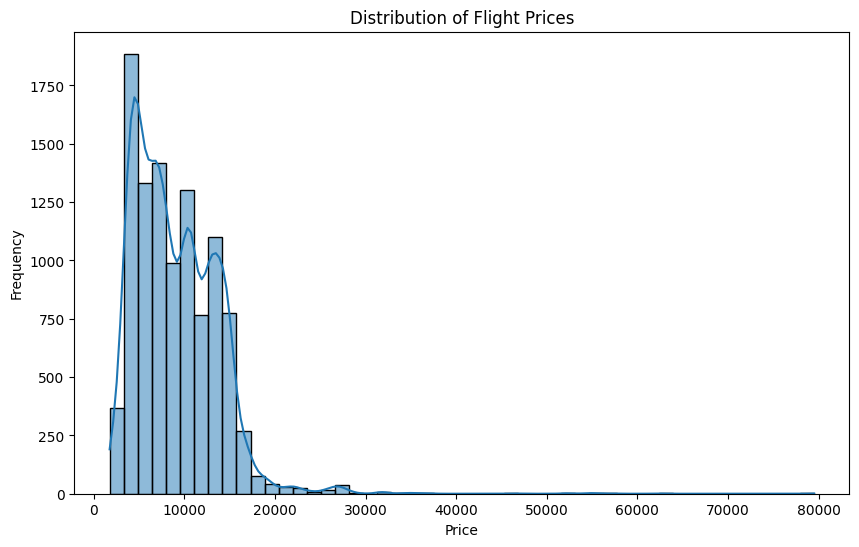

In [134]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Insights
- Majority of the flight price fall below $10,000

In [135]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,routes,Duration,Departure,Arrival
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50,Banglore->New Delhi,2.83,22.33,1.17
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25,Kolkata->Banglore,7.42,5.83,13.25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0,Delhi->Cochin,19.00,9.42,4.42
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25,Kolkata->Banglore,5.42,18.08,23.50
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45,Banglore->New Delhi,4.75,16.83,21.58


## Months vs Price

<Axes: xlabel='Month'>

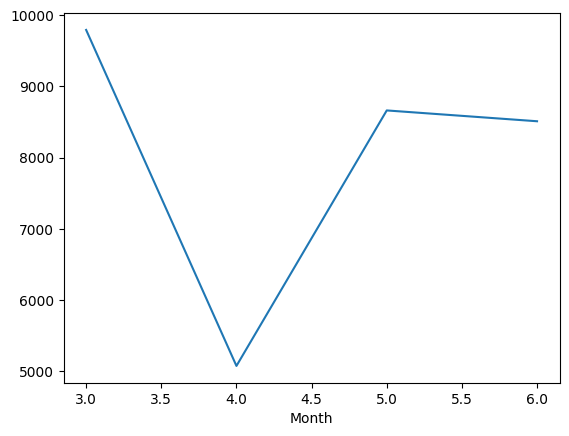

In [136]:
df.groupby('Month')['Price'].median().plot()

## Insights
- April have the cheapest average flight price between March to June
- March have the most expensive flight price bnetween March to June


### Average Price by Airline

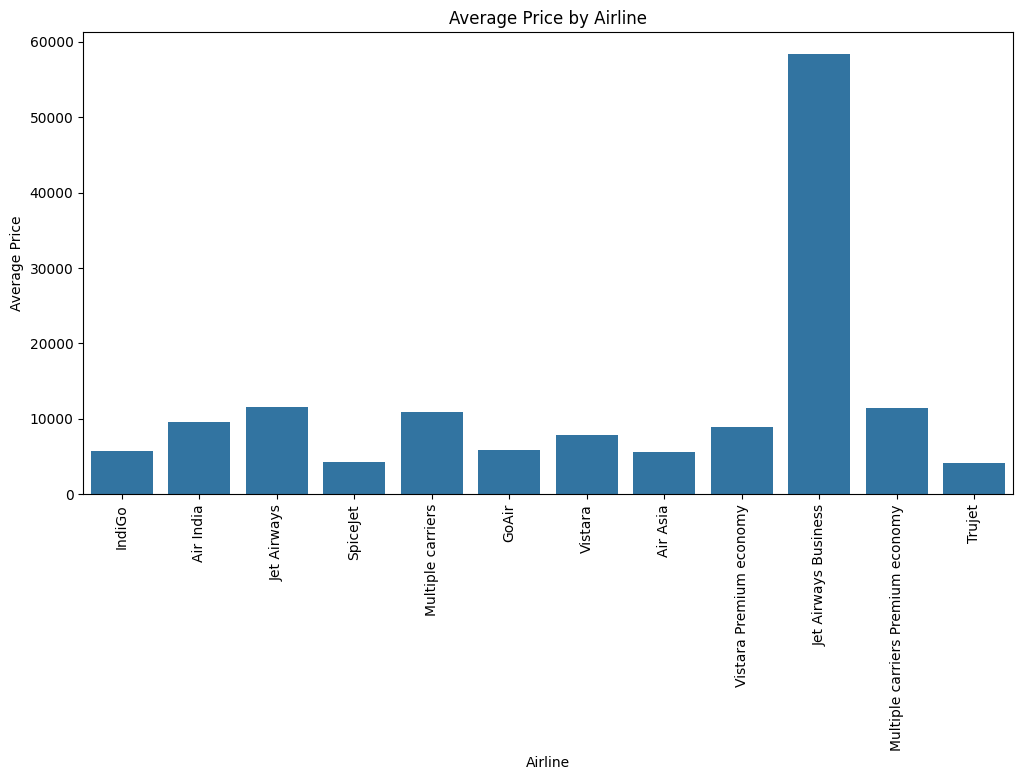

In [137]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Airline', y='Price', data=df, estimator=np.mean,ci=None)
plt.title('Average Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

## Insights
- Jet Airways Business is far more expensive compared to the rest of the airline


### Most Number of Flight

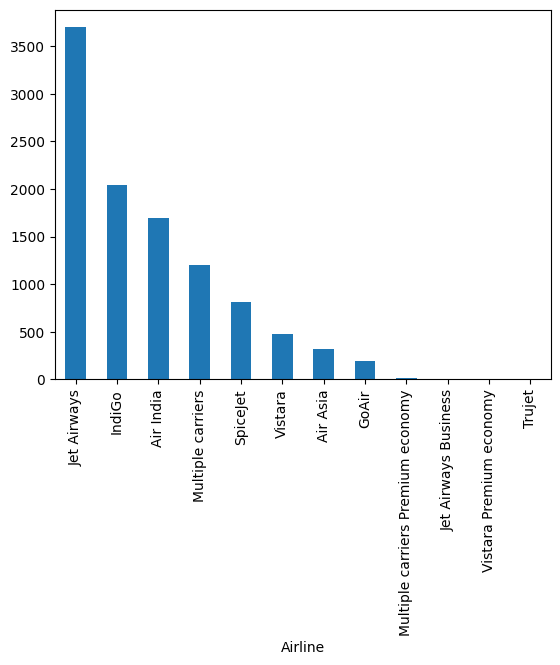

In [138]:
df['Airline'].value_counts().plot(kind = 'bar')
plt.show()

## Insights
- Most popular airline is Jet Airways 

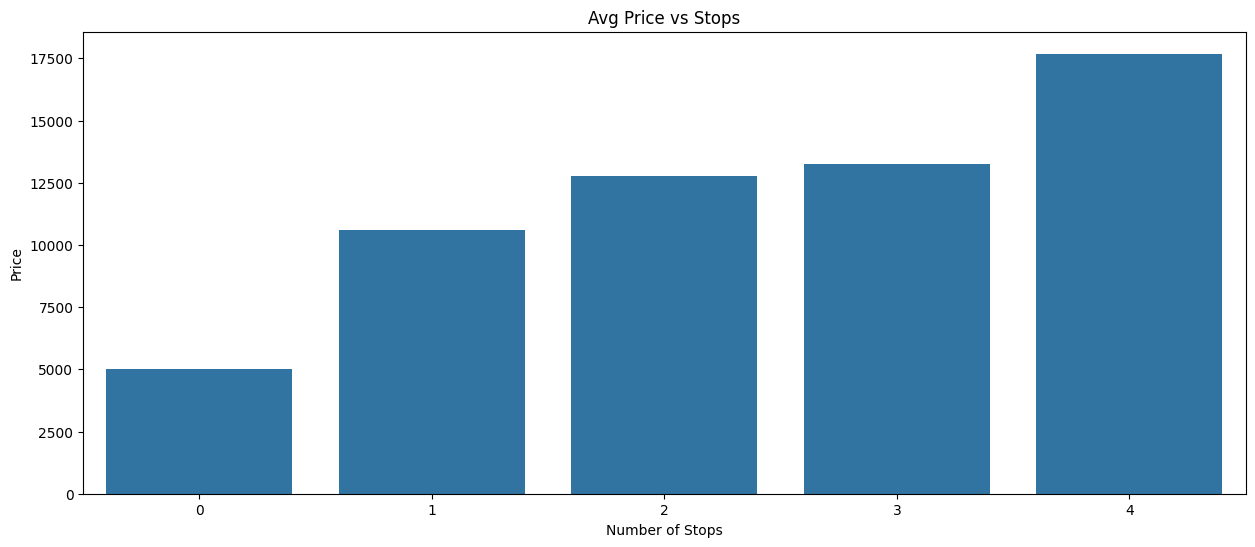

In [139]:
fig, axes = plt.subplots(figsize=(15, 6))
sns.barplot(ci=None,x='Total_Stops',y='Price',estimator=np.mean, data=df)
plt.title("Avg Price vs Stops")
plt.xlabel("Number of Stops")
plt.ylabel('Price')

plt.show()


# Insights
- Price increase as the number of stops increases

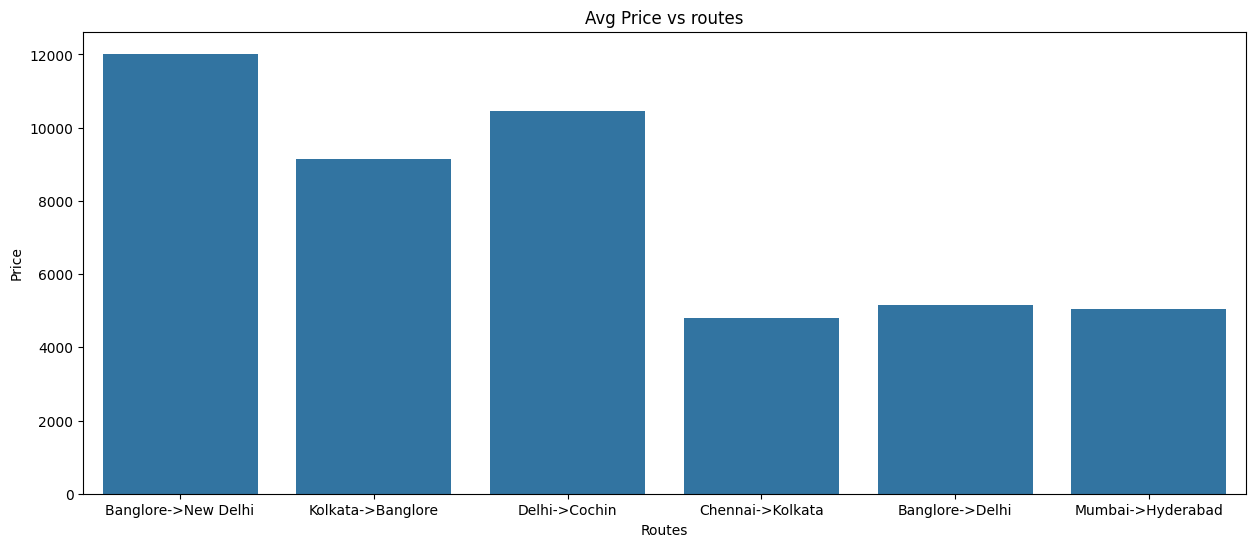

In [140]:
fig, axes = plt.subplots(figsize=(15, 6))
sns.barplot(x='routes',y='Price',estimator=np.mean, data=df, ci=None)
plt.title("Avg Price vs routes")
plt.xlabel("Routes")
plt.ylabel('Price')
plt.show()

## Insight
- Banglore to New Delhi routes have the highest flight price

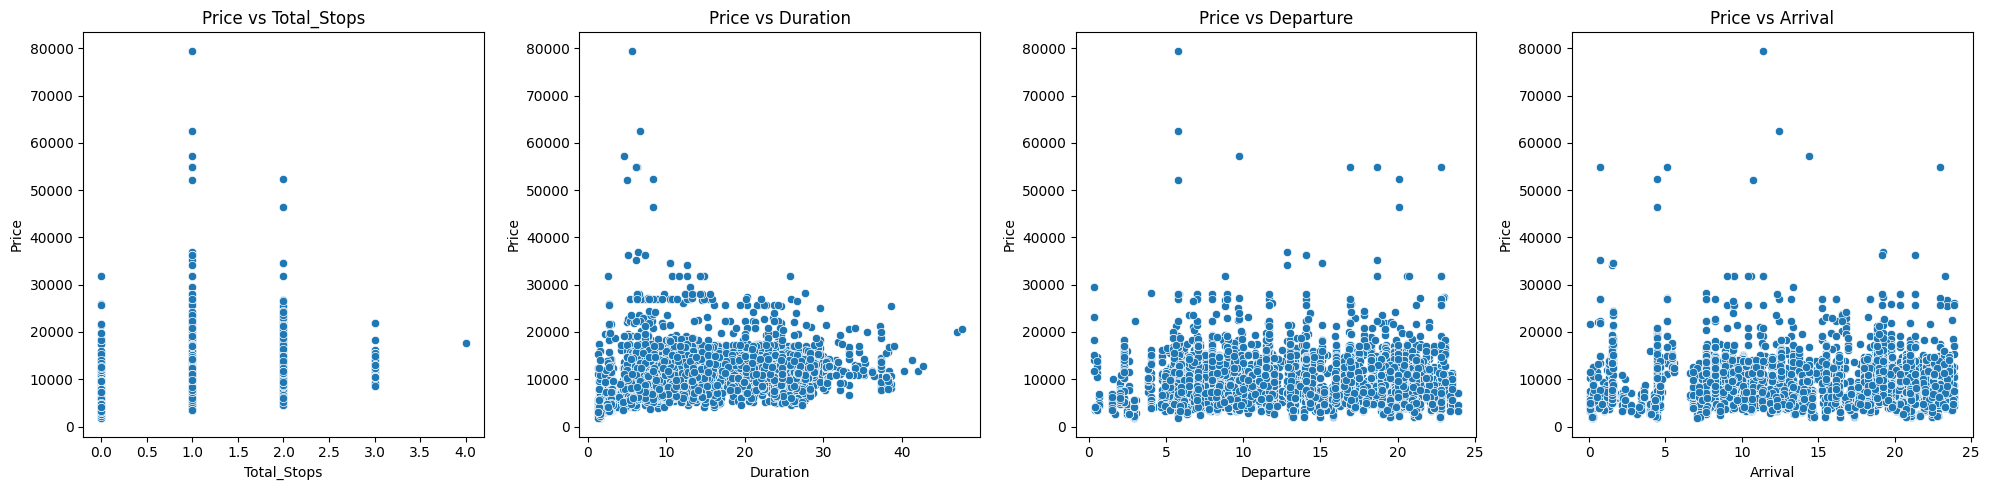

In [141]:
# Columns to plot
columns_to_plot = ['Total_Stops', 'Duration', 'Departure', 'Arrival']

# Plotting
fig, axes = plt.subplots(ncols=4, figsize=(20, 5))

for i, col in enumerate(columns_to_plot):
    sns.scatterplot(x=col, y='Price', data=df, ax=axes[i])
    axes[i].set_title(f'Price vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Price')

# Adjust layout
plt.tight_layout()
plt.show()

## Continuos Feature


## Outliers

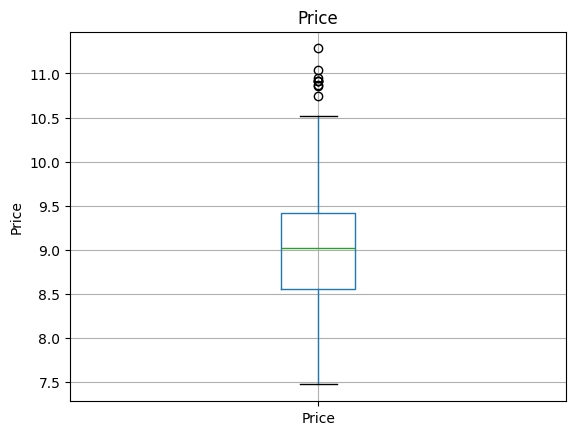

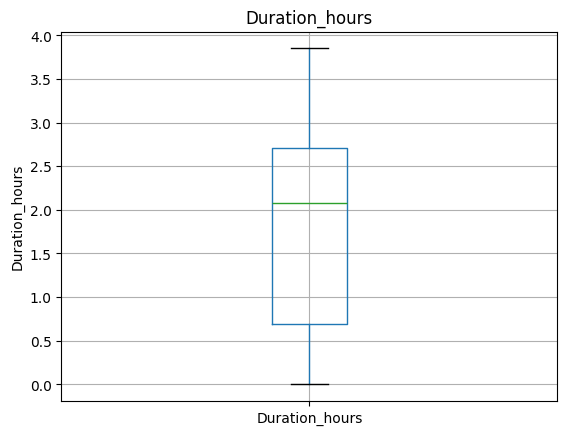

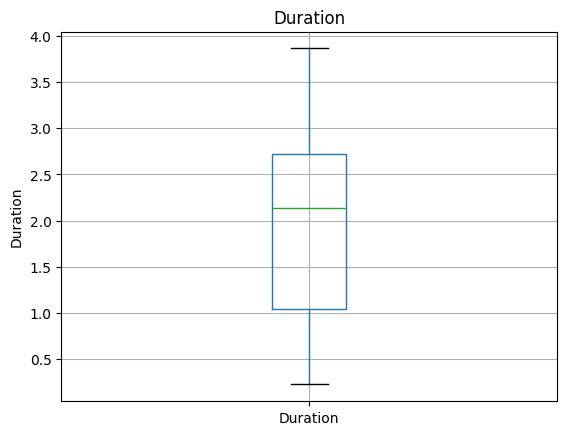

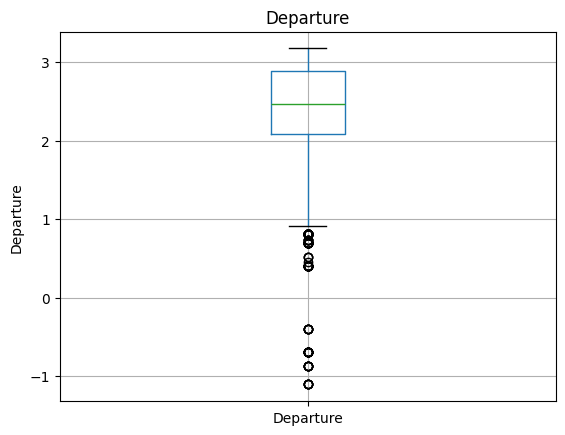

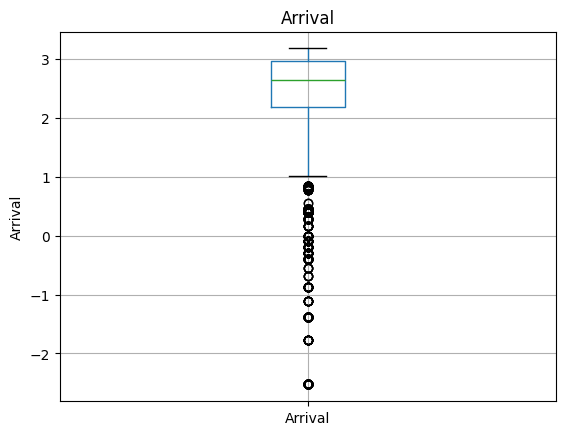

In [142]:
for feature in continous_feature:
    data = df.copy()
    if data[feature].nunique() < 25:
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

## Insights
- There are many outliers in price and departure and arrival

## Handling Rare Categorical Feature

In [143]:
for feature in categorical_features:
    temp = df.groupby(feature)['Price'].count()/len(df)
    temp_df = temp[temp>0.01].index
    df[feature]= np.where(df[feature].isin(temp_df),df[feature],'Rare_var')